In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import datetime
import yfinance as yfin
yfin.pdr_override()

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
from plotly import __version__
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [6]:
# Bank of America
BAC = pdr.get_data_yahoo("BAC", start, end)

# CitiGroup
C = pdr.get_data_yahoo("C", start, end)

# Goldman Sachs
GS = pdr.get_data_yahoo("GS", start, end)

# JPMorgan Chase
JPM = pdr.get_data_yahoo("JPM", start, end)

# Morgan Stanley
MS = pdr.get_data_yahoo("MS", start, end)

# Wells Fargo
WFC = pdr.get_data_yahoo("WFC", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [10]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.425449  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.081085  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.122406  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.074196  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.094856  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.995930  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.019234  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.112522  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.147514  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.508980  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.542273  11016400  
2006-01-04   31.530001  19.315603  10870000  
2006-01-05   31.495001  19.294163  10158000  
2006-01-06   31.680000  19.407503   8403800  
2006-01-09   31.674999  19.404434   5619600  

[5 rows x 36 columns]

In [11]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [12]:
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python3

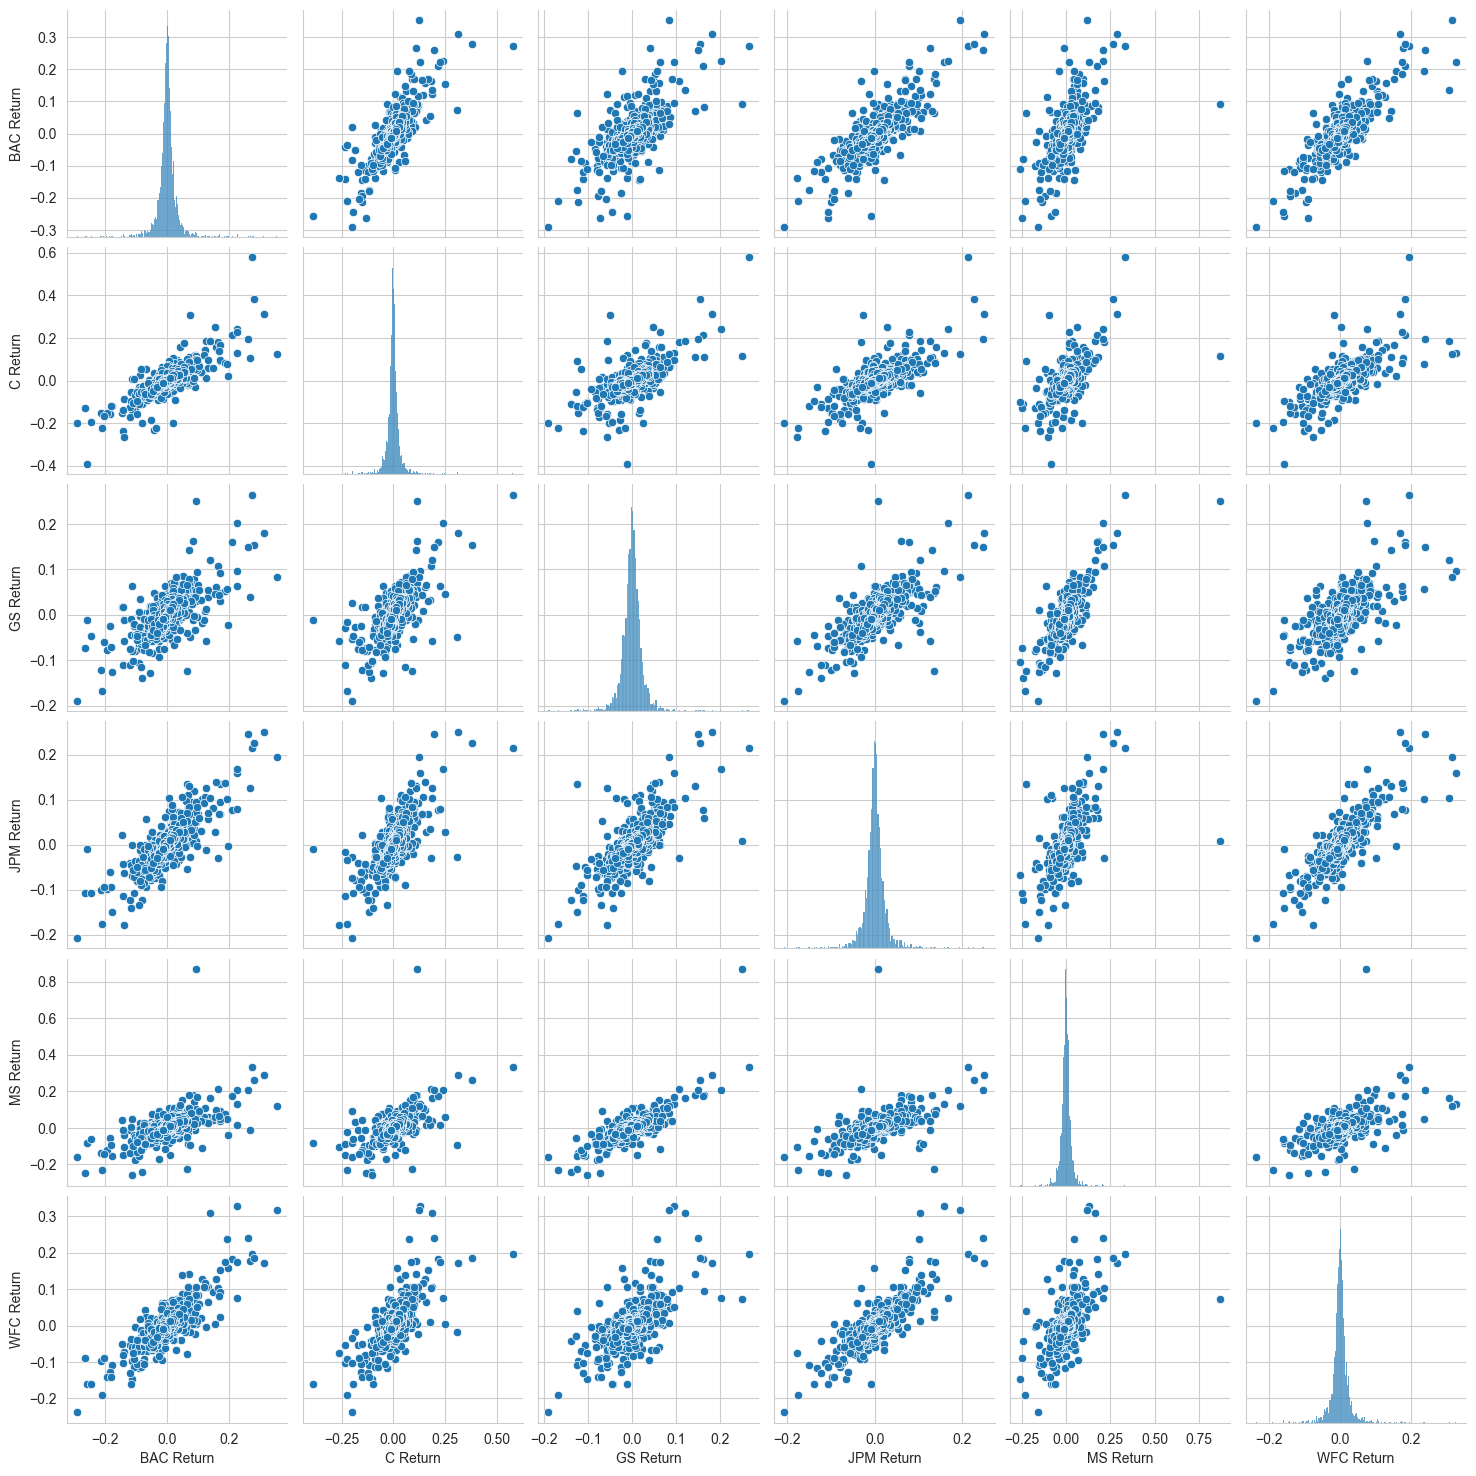

In [14]:
sns.pairplot(returns[1:])

In [15]:
# Worst Drop
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
# Best single-day gains
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [17]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [18]:
returns.loc['2015-01-01':'2015-12-31'].std() 

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='MS Return', ylabel='Count'>

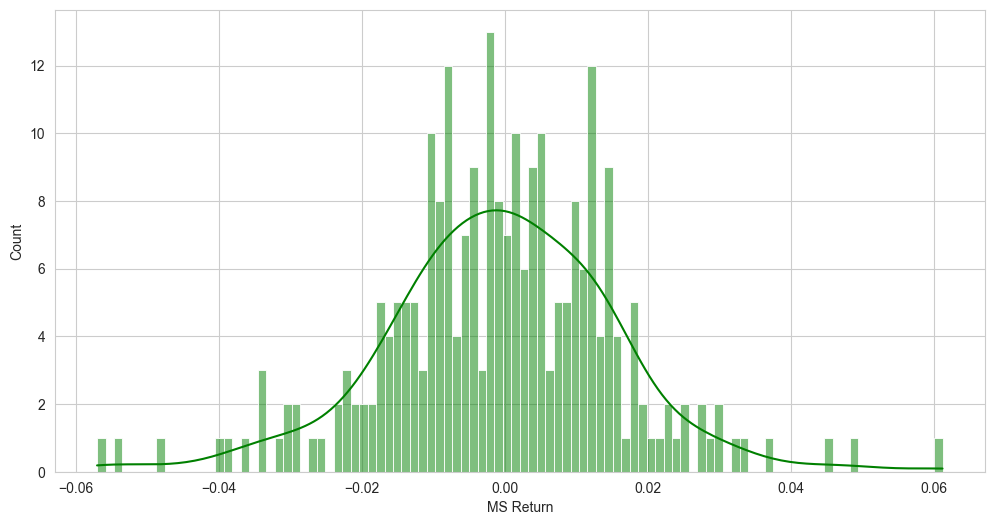

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100, kde=True)

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='C Return', ylabel='Count'>

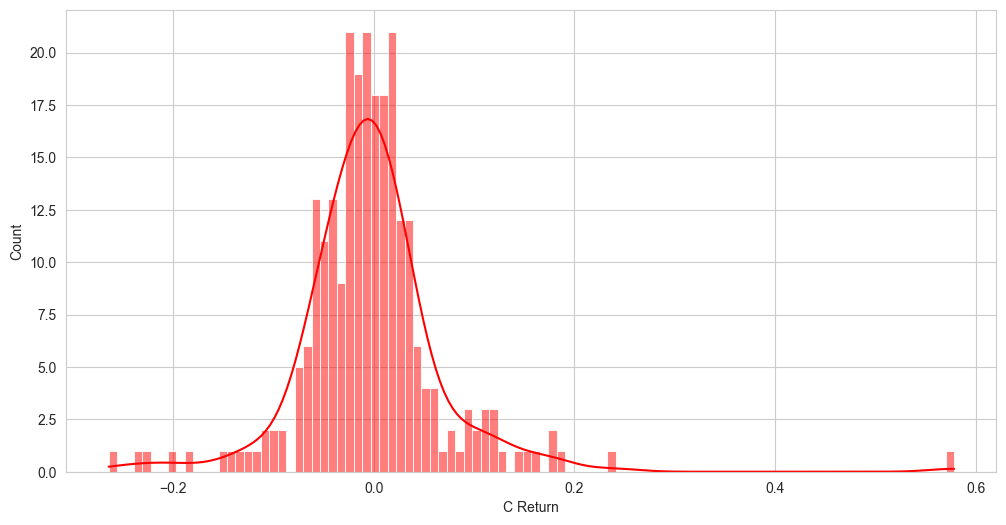

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=100, kde=True)

In [21]:
## plot showing Close price for each bank

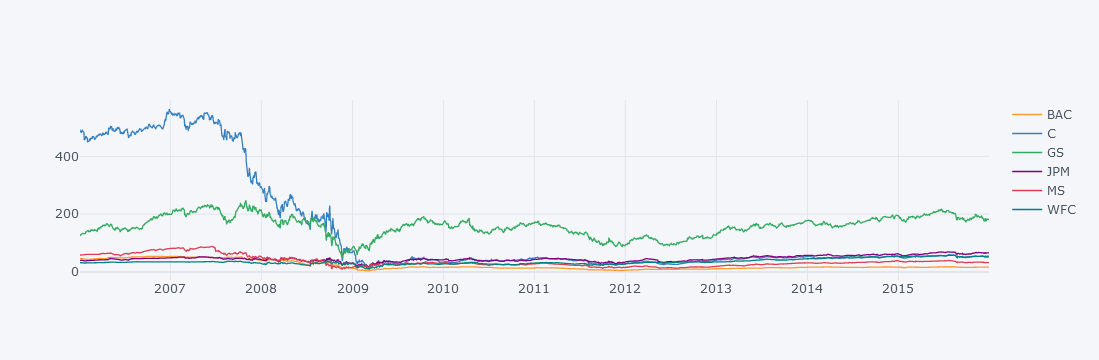

<Figure size 1200x1000 with 0 Axes>

In [22]:
plt.figure(figsize=(12, 10))
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

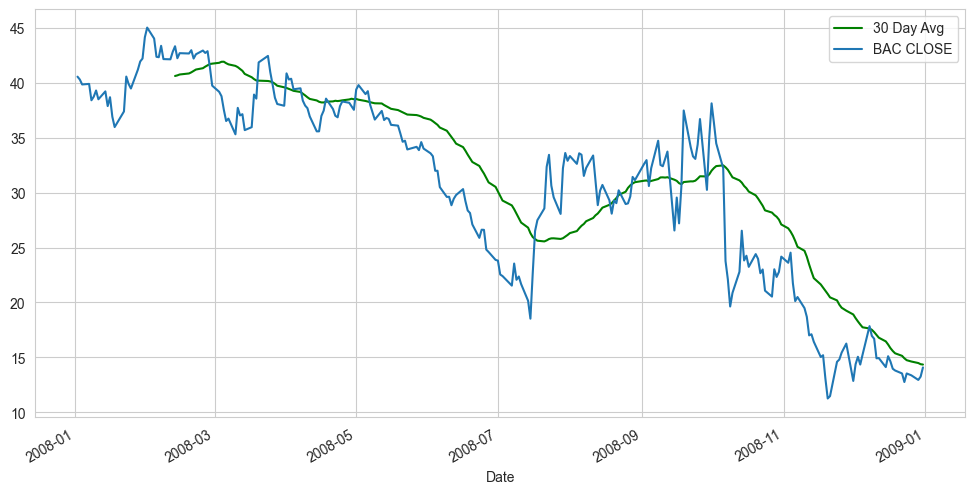

In [23]:
plt.figure(figsize=(12, 6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg', color='green')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

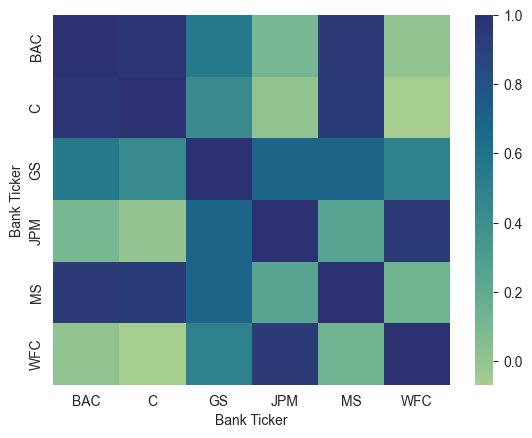

In [24]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), cmap='crest')

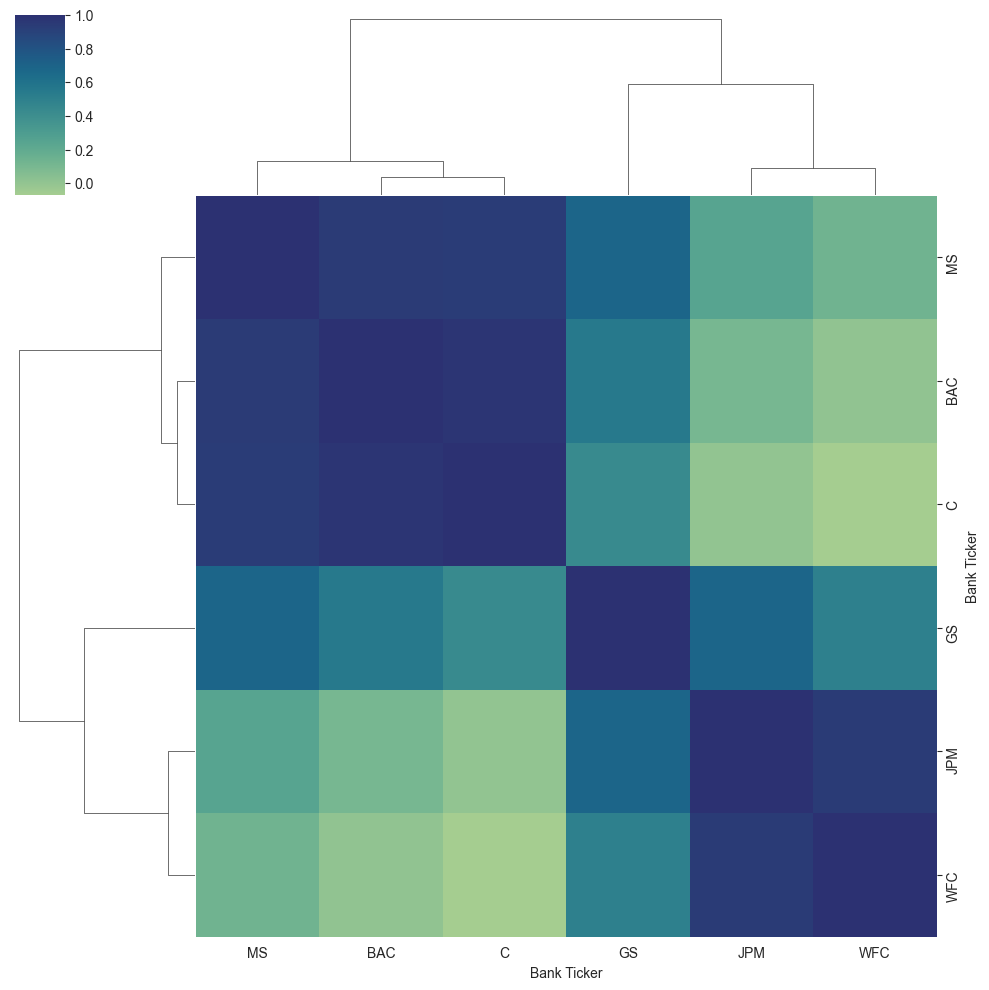

In [25]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), cmap='crest')

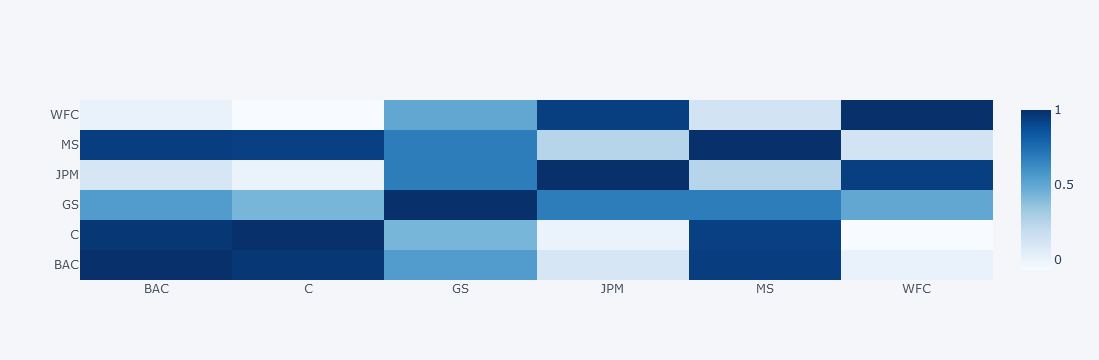

In [26]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='Blues')


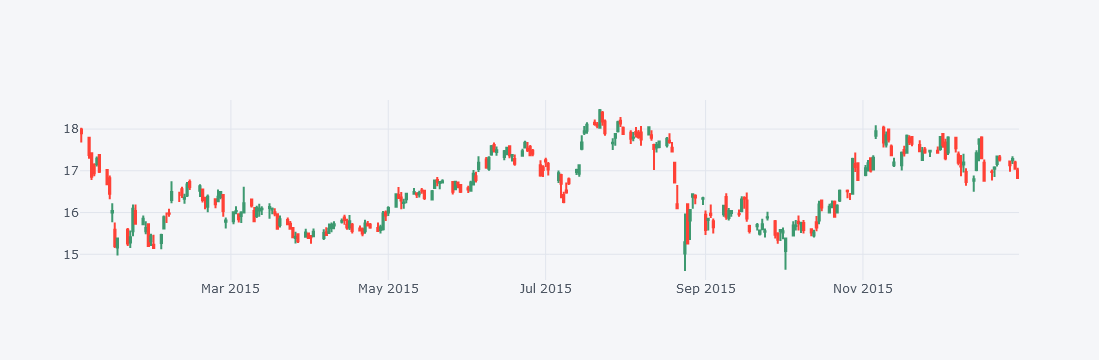

In [27]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

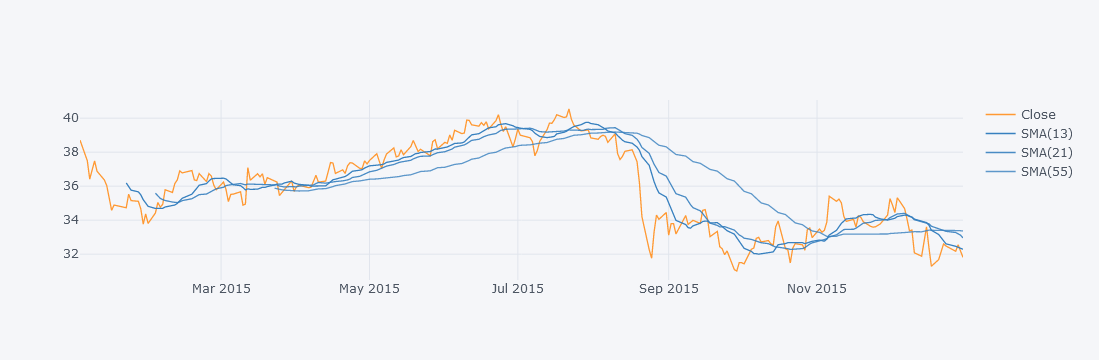

In [28]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

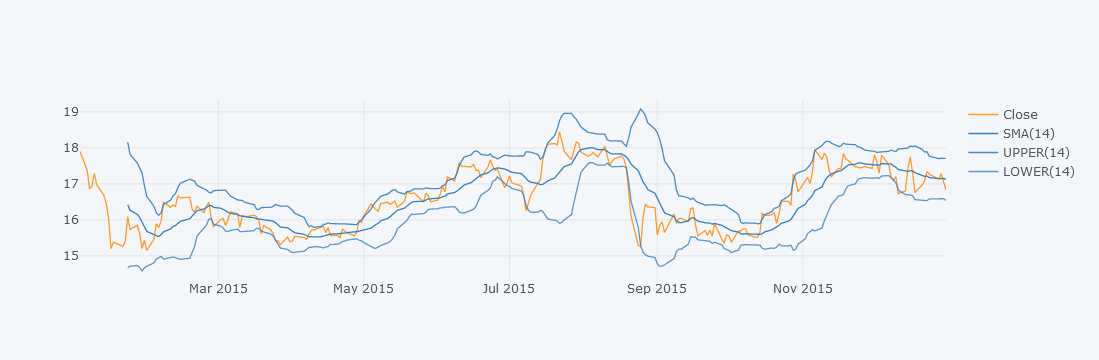

In [29]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')